In [1]:
import requests
import urllib.request
import os
import re
import os.path
import sys
import nltk
from nltk import word_tokenize , sent_tokenize , pos_tag
from nltk.corpus import stopwords
from tdmh import *
import numpy
import matplotlib.pyplot as plt
import sys
from os.path import join
from nltk.corpus import stopwords
import pandas as pd
import csv 
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import collections
from collections import Counter
from wordcloud import WordCloud 
!pip install tdmh
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('wordnet')
nltk.download('sentiwordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

In [2]:
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from tdmh import * 


freq = dict()
#To test whether it all runs well. 
quote = '''It was the best of times, it was the worst of times, 
it was the age of wisdom, it was the age of foolishness, 
it was the epoch of belief, it was the epoch of incredulity'''

words = word_tokenize(quote)
words = remove_punctuation(words)

for w in words:
    w = w.lower()
    #freq dict is used to remove duplicates
    freq[w] = freq.get( w, 0 ) + 1
         
for f in freq:
    word = 'occurrence'
    if freq[f] > 1:
        word += 's'
    print( f' "{f}" => {freq[f]} {word}' )


 "it" => 6 occurrences
 "was" => 6 occurrences
 "the" => 6 occurrences
 "best" => 1 occurrence
 "of" => 6 occurrences
 "times" => 2 occurrences
 "worst" => 1 occurrence
 "age" => 2 occurrences
 "wisdom" => 1 occurrence
 "foolishness" => 1 occurrence
 "epoch" => 2 occurrences
 "belief" => 1 occurrence
 "incredulity" => 1 occurrence


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nandi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Create a list of all the files in the corpus

In [3]:
#Create a list of all texts in corpus, this includes full csv files. 
import os
from os.path import isfile , join
import pandas as pd
texts = []
dir = 'Corpus' 

for file in os.listdir(dir):
    if re.search( r'csv$' , file ):
        path = os.path.join( dir , file )
        texts.append(path)







In [ ]:
#Create a list of negative reviews in the corpus. 
import os
from os.path import isfile , join
import pandas as pd
negative_texts = []
dir = 'Negative Reviews' 

for file in os.listdir(dir):
    if re.search( r'csv$' , file ):
        path = os.path.join( dir , file )
        texts.append(path)


In [ ]:
#Create a list of positive reviews in the corpus.
import os
from os.path import isfile , join
import pandas as pd
positive_texts = []
dir = 'Positive Reviews' 

for file in os.listdir(dir):
    if re.search( r'csv$' , file ):
        path = os.path.join( dir , file )
        texts.append(path)

In [4]:
## create text analysis functions
def get_title(path):
    title = os.path.basename(path)
    if re.search( r'csv$' , title ):
        # Remove csv extension
        title = title[ :title.index('.csv') ]
        # remove commas and dots
        title = re.sub( r'[.,]' , '' , title )
    return title


## create data for all  the texts in the corpus

In [6]:
out = open( 'data.csv' , 'w' , encoding = 'utf-8' )

pos_tags = ['JJ' , 'MD' , 'JJR' , 'JJS' , 'VBD']

## Header of the CSV file
out.write('title,tokens,sentences,ttr')

for t in pos_tags:
    out.write(f',{t}')
out.write('\n')

for text in texts:
    
    data = dict()
    print( f'Analysing {text} ...')
    
    ## Get the title, based on the filename
    title = get_title( text )
    
    ## read the full text
    fh = open( text, encoding = 'latin-1')
    full_text = fh.read()
    
    ## count the number of sentences
    sentences = sent_tokenize(full_text)
    data['nr_sentences'] = len(sentences)
    
    # dictionary to count the POS tags
    freq_pos = dict()    
    
    # variables for the calculation of type-token ratio
    ttr_cap = 3000
    freq_ttr = dict()
 
    # token count is initalised at 0
    data['nr_tokens'] = 0

    for s in sentences:
        words = word_tokenize(s)
        words = remove_punctuation(words)
        
        tags = pos_tag(words)
        # Each tag consists of two values: 
        # [0]: the word and [1] the POS tag
        for word_tag in tags:
            word = word_tag[0]
            tag = word_tag[1]
            
            # count the tokens
            data['nr_tokens'] += 1
            
            # place tokens in dictionary freq_ttr
            # only if the word count is less than ttr_cap
            # The nr of items in the dictionary eventually equals the nr of types
            if data['nr_tokens'] <= ttr_cap:
                freq_ttr[ word ] = freq_ttr.get( word , 0 ) + 1
                
            ## Count frequencies of all the POS tags
            freq_pos[ tag ] = freq_pos.get( tag ,0) +1
            
    pos_tags = ['JJ' , 'MD' , 'JJR' , 'JJS' , 'VBD']
    for t in pos_tags:
        data[t] = freq_pos.get(t,0)
                
    # Calculate TTR: number of items in freq_ttr dictionary
    # divided by ttr_cap
    data['ttr'] = len( freq_ttr ) / ttr_cap
    
    # write the results to a CSV file    
    out.write( f"{title},{data['nr_tokens']},{data['nr_sentences']},{data['ttr']}" )
    for t in pos_tags:
        out.write( f",{data[t] / data['nr_tokens'] }"  )
    out.write('\n')
    
out.close()
print('Done!')

Analysing Corpus\Arma3.csv ...
Analysing Corpus\Arma3_Negative.csv ...
Analysing Corpus\Arma3_Positive.csv ...
Analysing Corpus\CounterStrike.csv ...
Analysing Corpus\CounterStrike_Negative.csv ...
Analysing Corpus\CounterStrike_Positive.csv ...
Analysing Corpus\CrusaderKings2.csv ...
Analysing Corpus\CrusaderKings2_Negative.csv ...
Analysing Corpus\CrusaderKings2_Positive.csv ...
Done!


## Word Frequency

In order to ascertain the nature of the language used in Steam user reviews, a word frequency analysis may prove useful. i will first run a word frequency analysis on all the datasets, comprised out of three games available on Steam: Counter-Strike, Crusader Kings II, and Arma 3. The data allows me to filter out positive and negative reviews, so I intend to run analysis on all positive reviews, all negative reviews, as well as on each individual game. Each dataset contains 10000 reviews, though the review length varies. Games with a more RPG element tend to attract lengthier user reviews, as opposed to FPS games, which can be demonstrated with the lengthy reviews of Crusader Kings II. If I were to compare these games to each other, I would have to limit the corpus to a certain amount of tokens; however, the purpose of this research report is to ascertain whether negative reviews garner more extreme language than positive reviews. 

In [7]:
# Defining sortedByValue function. Take care when running this with a large dataset, tends to break my machine. 
def sortedByValue( dict , ascending = True ):
    if ascending: 
        return {k: v for k, v in sorted(dict.items(), key=lambda item: item[1])}
    else:
        return {k: v for k, v in reversed( sorted(dict.items(), key=lambda item: item[1]))}



In [8]:
from nltk import word_tokenize
from nltk.corpus import stopwords
# Excluding stopwords.
stopwords = stopwords.words('english')
# Creating a csv file to save these results to. Decided this step is unnecessary, but leaving in just in case. 
#out = open( 'freqSR.csv' , 'w' , encoding = 'latin-1' )

for text in texts:
    print( f'Analysing {text} ...')
    #out.write('Title,Word,Frequency')
    #out.write('\n')
    #Make a dictionary containing most frequent words. 
    freq = dict()
    
    #Get the title, based on the filename
    title = get_title( text )
    
    #Make sure the relevant column is read. Specifying the column, and making sure any invalid lines are skipped. 
    us = pd.read_csv(text , usecols = ['review_text'] , error_bad_lines=False , sep = ';')
    us.dropna()
    #Converting user_review column into a list.
    uslist = list(us['review_text'])
    
    #Converting the list into string.
    usstr = ' '.join(str(e) for e in uslist)
    
    #Tokenize!
    words = word_tokenize(usstr)
    words = remove_punctuation(words)
    
    #And now for the frequency analysis.
#    out = open( 'freqSR.csv' , 'w' , encoding = 'latin-1' )
    for w in words: 
        w = w.lower()
        if w not in stopwords:
            freq[w] = freq.get( w, 0 ) + 1
        for f in freq: 
            word = 'occurrence'
            if freq[f] > 1:
                word += 's'
        #Save results of analysis to CSV file that was created earlier. Note: It also takes foreign characters as words. 
  #      for f in sortedByValue(freq, ascending = False ) : 
 #           print( f"{title} , {f} , {freq[f]} , {word} " )
#            out.write('\n')
        
#df.to_csv("wordfreqSR.csv", header=headerList, index=False)
#out.close()
print('Done!')
        
    

Analysing Corpus\Arma3.csv ...
Analysing Corpus\Arma3_Negative.csv ...
Analysing Corpus\Arma3_Positive.csv ...
Analysing Corpus\CounterStrike.csv ...
Analysing Corpus\CounterStrike_Negative.csv ...
Analysing Corpus\CounterStrike_Positive.csv ...
Analysing Corpus\CrusaderKings2.csv ...
Analysing Corpus\CrusaderKings2_Negative.csv ...
Analysing Corpus\CrusaderKings2_Positive.csv ...
Done!


## WordCloud of current Steam user reviews dataset. ##

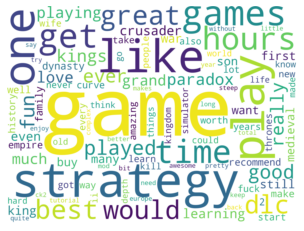

In [9]:
# Reminder to self: This line allows the Wordcloud to show up in a notebook. 
%matplotlib inline
import sys

import matplotlib.pyplot as plt 
from wordcloud import WordCloud 

wordcloud = WordCloud( background_color="white",  width=2000,height=1500, max_words= 100,relative_scaling=0.5,normalize_plurals=True).generate_from_frequencies(freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
#100 most common words in entire dataset.

# adding header
#headerList = ['app_name', 'word', 'occurrence']
  
# converting data frame to csv
#df.to_csv("wordfreqSR.csv", header=headerList, index=False)

#df.head()
out = open( 'SRWF.txt' , 'w' , encoding = 'utf-8' )
count = 0 
max = 100

print( f'\n{max} most frequent words:' )
 
            
for f in sortedByValue( freq , ascending = False ) :
    count += 1
    out.write(  f'{f} -> {freq[f]}' )
    out.write('\n')
    print( f'{f} -> {freq[f]}' )
    if max == count:
        break
out.close()
    


100 most frequent words:
game -> 9378
strategy -> 1760
like -> 1579
play -> 1554
one -> 1496
games -> 1466
get -> 1327
time -> 1219
hours -> 1189
great -> 1143
best -> 1098
would -> 1055
dlc -> 1014
played -> 1008
good -> 924
fun -> 924
ever -> 858
really -> 799
kings -> 765
paradox -> 743
love -> 683
playing -> 683
grand -> 679
much -> 674
learning -> 662
crusader -> 657
even -> 592
king -> 568
war -> 543
son -> 532
still -> 528
many -> 528
first -> 521
buy -> 519
medieval -> 501
want -> 498
dynasty -> 481
family -> 467
well -> 467
make -> 452
empire -> 442
2 -> 438
recommend -> 436
start -> 412
history -> 412
curve -> 409
ii -> 399
amazing -> 398
wife -> 394
years -> 390
fuck -> 386
new -> 383
worth -> 382
learn -> 380
got -> 380
every -> 378
lot -> 375
way -> 372
thrones -> 370
take -> 366
also -> 358
people -> 348
could -> 342
kill -> 338
never -> 337
kingdom -> 331
simulator -> 330
things -> 328
know -> 326
go -> 316
made -> 313
old -> 313
think -> 306
life -> 294
world -> 293
ha

## Sentiment Analysis.

In [ ]:
# Install if needed. 
##!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER
sentimentAnalyser = SentimentIntensityAnalyzer()

In [ ]:
# Lazy man's import of the correct file but I found that accuracy was better than trying to make it elegant. 
# Also making sure that the CSV file is being read as a string and not a float.
# Prints head to check file is being parsed properly. 
jw = pd.read_csv('C:\\Users\\nandi\\Documents\\BDMS Master\\Semester 2\\Text and Data Mining\\Steam_Reviews_Research_Project\\Corpus\\CrusaderKings2_Negative.csv' , usecols = ['review_text'] , error_bad_lines=False )
jw = jw.astype(str)
jw.head()

In [ ]:
# Defining a function that only provides compound score - positive and negative score redundant in this case. 
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [ ]:
#Test on an example user review from Crusader Kings 2.
calculate_sentiment('My brother married my daughter and then I had her killed because the Pope asked me to. 10/10.')

In [ ]:
# Testing the function calculate_sentiment() on corpus. 
jw['sentiment_score'] = jw['review_text'].apply(calculate_sentiment)
print(jw['sentiment_score'])

In [ ]:
# Calculates the average compound score for a whole CSV file. 
average = sum(jw['sentiment_score']) / len(jw['sentiment_score'])
print(average)

In [ ]:
# Sorts reviews by lowest sentiment score to highest - 50 reviews. 
jw.sort_values(by='sentiment_score', ascending=True)[:50]

In [ ]:
# Sorts reviews by highest sentiment score to lowest - 50 reviews. 
jw.sort_values(by='sentiment_score', ascending=False)[:50]

In [ ]:
# Writes all the sentiment scores to a .txt file. Does not function well with a large CSV file. 
with open('sentimentscores.txt' , 'w', encoding='utf-8') as outfile:
    for index, row in jw.iterrows():
        sentimentAnalyser.polarity_scores(jw['review_text'])
        outfile.write(f"""'{row}' \n
        😓 Negative Sentiment: {sentiment_scores['neg']}  
        😒 Neutral Sentiment: {sentiment_scores['neu']} 
        🥳 Positive Sentiment: {sentiment_scores['pos']} 
        🥴 Compound Sentiment: {sentiment_scores['compound']}
        \n""")
        
out.close()
        
    


In [ ]:
# I am not sure why I have this here and above but I am loath to delete this. I think I meant to have it printed to a new CSV file but gave up while I was struggling with overly large CSV files. 
jw['sentiment_score'] = jw['review_text'].apply(calculate_sentiment)
print(jw['sentiment_score'])

In [ ]:
# Calculates the negative, neutral, positive, and compound score of each row in a CSV file. Cannot be run on a large CSV file. 
for index, row in jw.iterrows():
        sentimentAnalyser.polarity_scores(jw['review_text'])
        print(f"""'{row}' \n
        😓 Negative Sentiment: {sentiment_scores['neg']}  
        😒 Neutral Sentiment: {sentiment_scores['neu']} 
        🥳 Positive Sentiment: {sentiment_scores['pos']} 
        🥴 Compound Sentiment: {sentiment_scores['compound']}
        \n""")